# Does changing the rate variable in the following model actually change the rate of the Poisson process?

$NeuronGroup(N, 'rates : Hz', threshold='rand()<rates*dt')$

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from brian2 import *
%matplotlib inline
plt.viridis()
duration = 100000.*ms
dt = 1000. * ms

In [25]:
ratesmon = []
start_scope()
rate =  200 * Hz #np.random.randint(100, 200) * Hz
ratesmon.append(rate)
inp = NeuronGroup(1, 'rate : Hz', threshold='rand()<rate*dt', dt=0.1 * ms)
inp.rate = rate
@network_operation(dt=dt)
def change_stimulus():
    rate = np.random.randint(100, 200) * Hz
    ratesmon.append(rate)
    inp.rate = rate
spikemon = SpikeMonitor(inp)
run(duration)

WARNING    "dt" is an internal variable of group "neurongroup_2", but also exists in the run namespace with the value 1. * second. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


(0, 100000.0)

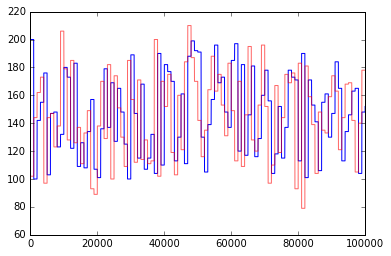

In [26]:
# rate evolution

empirical_rates = []
for t_lim in np.linspace(dt/ms, duration/ms, duration/dt)*ms:
    occurances_in_dt = np.count_nonzero([x if (t_lim-dt) <= x <t_lim else 0 for x in spikemon.t[:] ]) 
#     print occurances_in_dt
    empirical_rates.append(occurances_in_dt / (dt))
    
    
    
plt.plot(np.repeat(np.asarray(ratesmon), dt/ms))
plt.plot(np.repeat(np.asarray(empirical_rates), dt/ms), color='r', alpha=.6)

plt.xlim([0, duration/ms])
# plt.ylim([50, 250])

In [27]:
print spikemon.num_spikes / (duration)
print ratesmon[0]

145.48 Hz
200. Hz


In [28]:
print np.mean(ratesmon)

146.673267327


WARNING    "dt" is an internal variable of group "neurongroup_1", but also exists in the run namespace with the value 1. * second. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


<neurongroup_1.rate: array([ 200.]) * hertz>


(0, 100000.0)

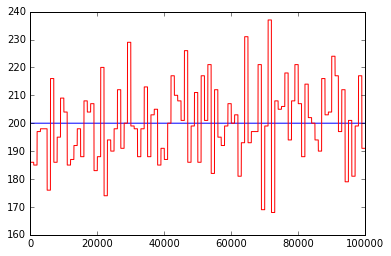

In [31]:
start_scope()

inp = NeuronGroup(1, 'rate : Hz', threshold='rand()<rate*dt', dt=0.1 * ms)
inp.rate=ratesmon[0]
spikemon2 = SpikeMonitor(inp)
print inp.rate
run(duration)
# rate evolution

empirical_rates = []
for t_lim in np.linspace(dt/ms, duration/ms, duration/dt)*ms:
    occurances_in_dt = np.count_nonzero([x if (t_lim-dt) <= x <t_lim else 0 for x in spikemon2.t[:] ]) 
#     print occurances_in_dt
    empirical_rates.append(occurances_in_dt / (dt))
    
    
    
plt.plot(np.repeat(np.asarray(ratesmon[0]), duration/ms))
plt.plot(np.repeat(np.asarray(empirical_rates), dt/ms), color='r')

plt.xlim([0, duration/ms])
# plt.ylim([50, 250])

In [32]:
print spikemon.num_spikes / (duration)
print ratesmon[0]

145.48 Hz
200. Hz


# Answer? It would seem that this is the way to...